In [170]:
from IPython.display import HTML

HTML('''<script>
show=true; 
function code_toggle() {
 if (show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 show = !show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code blocks."></form>''')

# Introduction

## Challenge Presented

We have been presented with a dataset provided by energia where the there are 70,000 EV users and the company itself has 10% of those customers but they could only identify 2.5 k customers. **The challenge is to find the rest of the suspected EV user.** 

The key outcome for this challenge was to develop a metric that can effectively differentiate between customers who are likely to own an electric vehicle and those who are not, based on their energy consumption patterns.

To tackle this challenge, I performed exploratory data analysis (EDA) to gain insights and understand the characteristics of the data. I then used a combination of machine learning algorithms such as decision trees, and naïve bayes to build predictive models and used metrics such as accuracy, precision, recall, F1 score to evaluate the performance of the model.

The report will be sturctured as follows:

**Section 1:** Data Pre-processing  
**Section 2:** Methodology  
**Section 3:** Evaluation & Analysis  
**Section 4:** Conclusion  


## Section 1: Data Pre-processing

The data presented by the Company contained the billing data for a total of **186558 Ev and Non-Ev users**.The investigation will focus on analyzing the provided dataset, which includes customer information and energy usage data. We will use this data to identify customers who are most likely to adopt EVs and benefit from EV tariffs. 
Our analysis will cover monthly billing data for two 2 years from January 2021 to February 2023.

Below is an overview of the data displaying all the 25 columns and their datatypes.
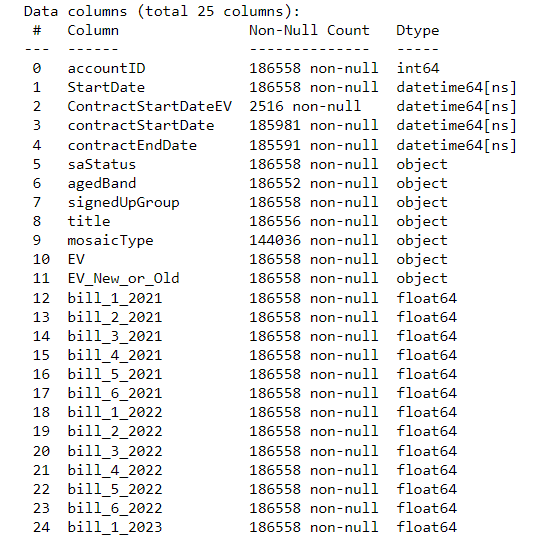

As a part of the **Exploratory Data Analysis**, the first step was to assess the null/ missing values present in the dataset.Which was done by printing out the sum of null values for all the columns and then displaying it using heatmaps. These missing values were later imputated in the data.
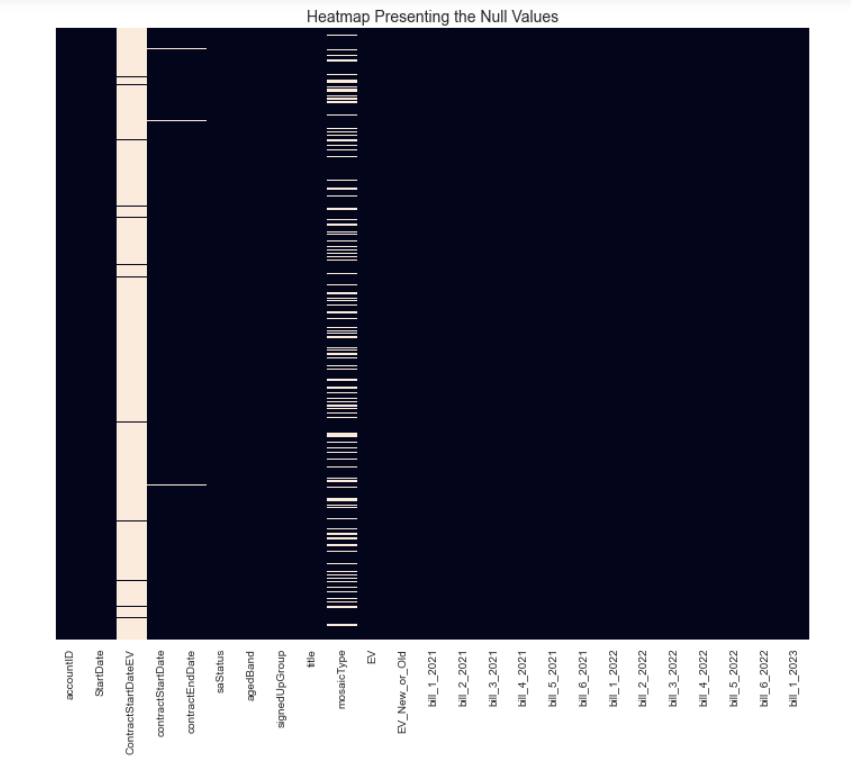

                               
                                      
 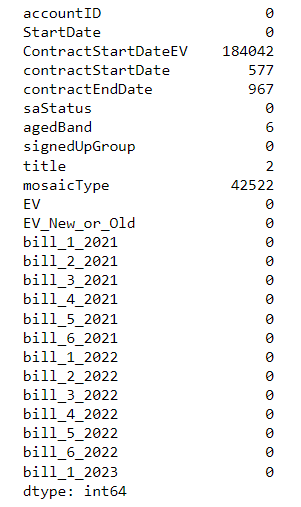
 <center>_Figure 1: Displaying the count of the null values_

The EDA involved several other steps, **including handling missing data, making univariate plots, making correlation matrices, and checking for outliers.**

A lot of univariate graphs were plotted using the raw data to gain insights and to see there were any patterns or any trends in the data.
A line chart was plotted for the sum of billing columns to see if they followed any trend or any anomalies in the data that might indicate a change in usage but then graphs were pretty similar for the both EV users and Non-EV user.

Below is the graph displaying the line chart.
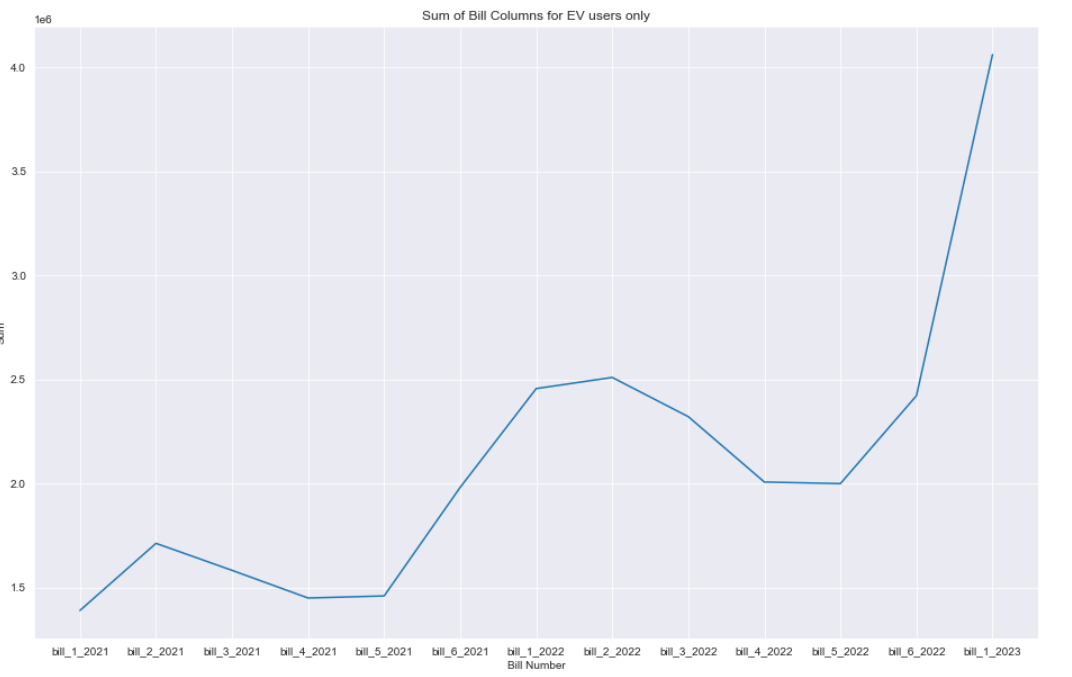 
 <center>_Graph 1: Displaying the trend for EV users_
 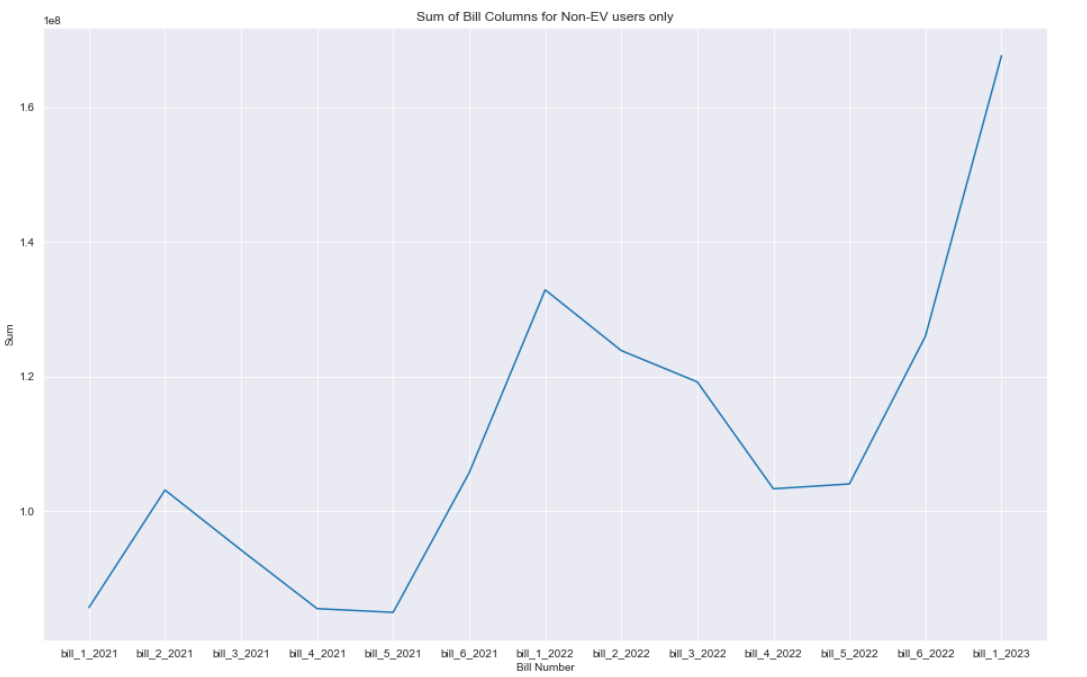
  <center>_Graph 2: Displaying the trend for  Non-EV users_

**Inference:** The similarities in the graph suggests that there could be potential or suspected EV customers which are categorised as Non-EV user for now in the data.We also see that there is an increase in the consumption of energy overtime for both EV and Non-EV users but that does not necessarily suggest that there may be a strong correlation between EV usage and billing activity since there could be EV users are using public charging stations that are not recorded in the billing data.

## Univariate plots

Univariate plots were plotted to identify which variables are likely to be important predictors of the target variable in the analysis.If a variable has a large number of missing values or outliers, it may not be a good predictor as it may introduce bias or error into the analysis.

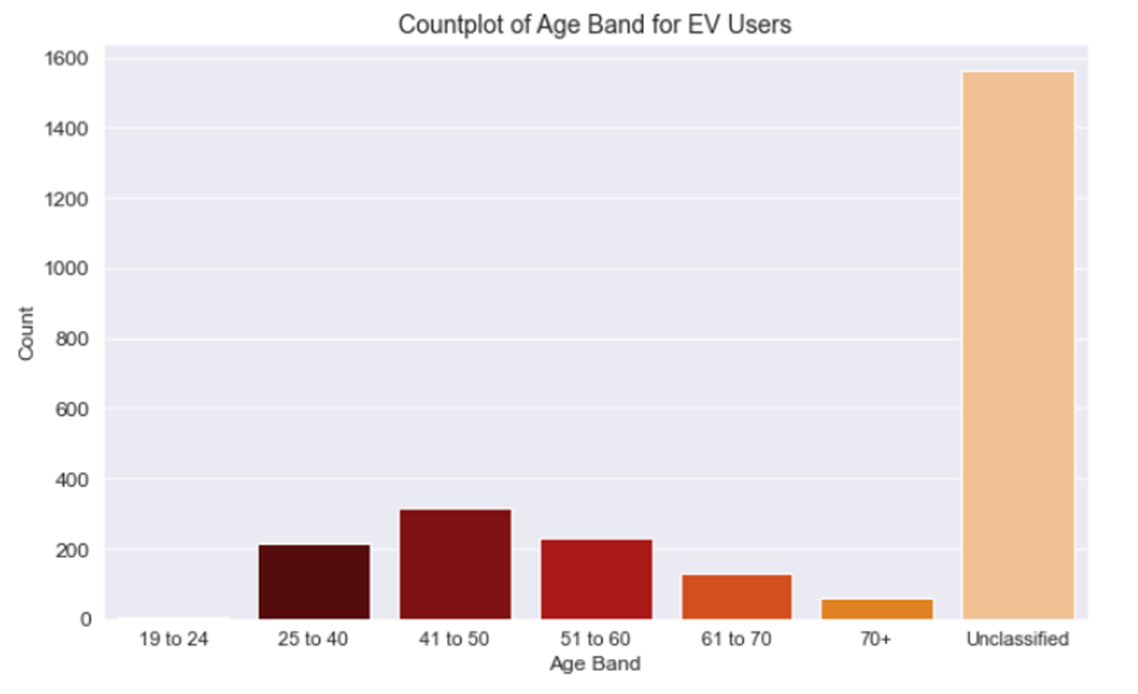
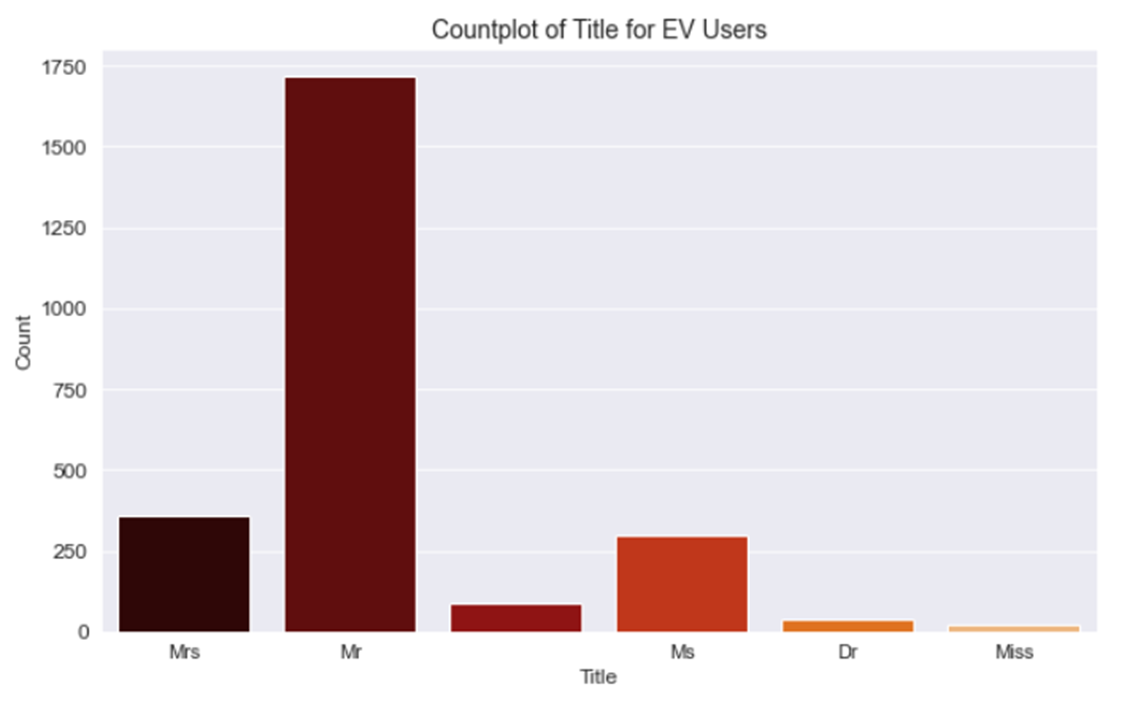

## Infernece
From the ageband and title countplots, we cannot infer much since counterplot shows that the majority of the data has missing values and it was unclassified it may indicate that the variable is not well represented in the dataset and therefore may not be a strong predictor of the target variable.

## Imputing the Missing Values

The missing values were imputed as follows:
1. Ageband - Filled NA values with 'Unclassified'
2. Mosaic Type-  Filled NA values with 'Unknown'
3. title - Replacing the nan values of title with the mode of the title column i.e. 'Mr'

Before passing the final data to the model there were a total of **1903** rows that contained '0's for all the 13 columns for the billig data were removed becasue they were the outliers in the data.

## Section 2: Methodology

The given problem is a supervised classification problem since the target variable which is EV 'Y' or 'N' are labelled in the dataset.After exploring the data through EDA, it was identified that the dataset was highly imbalanced meaning our target variable was not equally distributed in the data and it definitely required resampling.

Several methods of resampling are:
1. Under Sampling
2. Over Sampling
3. SMOTE(Synthetic minority Over sampling Technique

The data were resampled using Under-Sampling rather than the Over-Sampling or SMOTE which involves creating synthetic instances in the minority class by duplicating or generating new samples because that would only increase the data when we already have a large dataset thereby increasing the risk of overfitting.
Thus, Under-Sampling was used where the majoirty class which is 'N' in this case was reduced to the minority class'Y' by randomly removing rows from the majority class.

The figure below represents the impact of Under-Sampling on the original class propotions.

   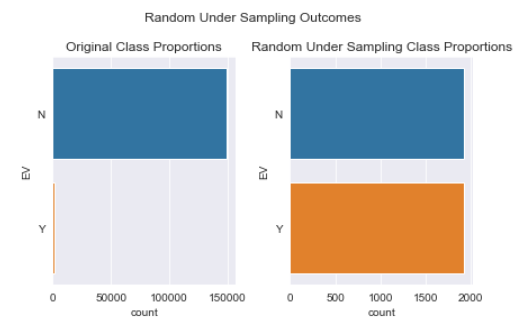
        <center>_Graph 3: Under-Sampling Outcomes_
 

### Model Building and Training

After looking at probable models such as **Decision Tree & Naive Bayes** the Gaussian Naïve Bayes model was chosen due to its better accuracy on our dataset.The **Gaussian Naïve Bayes model**  performs well for datasets with a limited amount of features especially when the features are continuous.It determines the probability of each class label for a given set of features under the assumption that features are independent of one another, given the class label. The anticipated class label is then chosen as the one with the highest probability.

To implement the model the **target varibale** was separated from the **feature variable** and stored as **y** and **x** respectively.We then split the data into training and testing subsets using **train_test_split** with a **test_size =0.18**
The subsets are as follows:
1. X_train: This is an array containing the training set input features.
2. X_test: This is an array containing the test set input features.
3. y_train: This is an array containing the training set target variable.
4. y_test: This is an array containing the test set target variable.

After splitting the data these were the metrics:

1. X_train = 151414
2. X_test = 33238
3. y_train = 151414
4. y_test   =   33238

The following were calculated :
1. The number of 'YES' in the training data is =  1926
2. The number of 'NO' in the training data is =  149488
3. The number of 'YES' in the testing data is =  426
4. The number of 'NO' in the testing data is =  32812

After splitting the data, the data was resampled using the randomUnderSampler the function first randomly selects a subset of the majority class (the class with more examples) such that its size matches that of the minority class (the class with fewer examples).
This results in a resampled version of the training data where the classes are balanced.


We then fit the classifier to the resampled data and train the model on the resampled data.
In the training data above we saw that the no of "YES" were 1926 and thus after resampling, the function returns the same number.


The following were calculated :
1. The no of 'YES' after resampling is =  1926
2. The no of 'NO' after resampling is =  1926

We then make Make predictions on the test set
**y_pred = model.predict(X_test)**
The above line of code predicts the output labels for a set of input features X_test using the trained machine learning model model, and assigns the predicted labels to the variable y_pred.

## Section 3: Evaluation & Analysis 

The following was predicted from the test dataset:

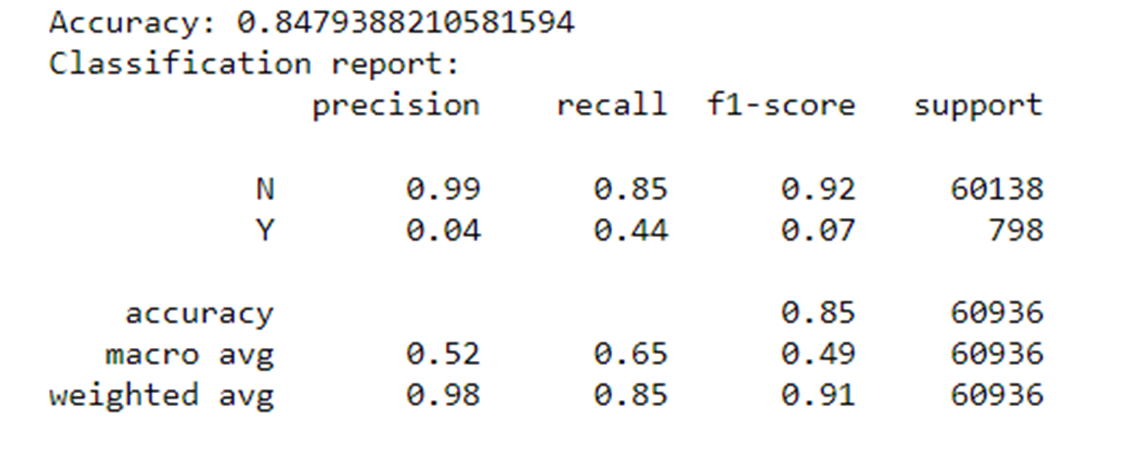
 <center>_Graph 4:Classification Report_
    


## Results

We see that the model gives an **accuracy of 85%** 

**1. F1 Score:**
    
A precision of 0.99 for the 'N' class (indicating non-EV users) means that the model correctly identified 99% of the non-EV users out of all the instances it classified as non-EV users. In other words, out of all the instances where the model predicted that the customer is not an EV user, 99% of them were actually not using EVs.
Similarly, a precison of 0.04% for the 'Y' class indicates that out of all the time where the model predicted that the customer is an EV user, 4% of them were actually not using EVs.


**2. Recall:**

A recall of 0.85 for the 'N' class indicates that out of all the instances where the true label was’N’,the model correctly identified 85% of them as non-EV Users. Similarly a recall of 0.44 for class 'Y' presents that the model correctly identified 44% of them as EV Users

**3. F1 Score:**

The F1 score is the harmonic mean of precion and recall. A higher F1 scoe indicates the model has better overall performance.

## Confusion Matrix

A confusion matrix is frequently used to assess how well a machine learning model is working. In a classification problem, the matrix displays the proportion of accurate and inaccurate predictions provided by the model in relation to the actual results (or ground truth).

Below is the figure for confusion matrix that our model predicted
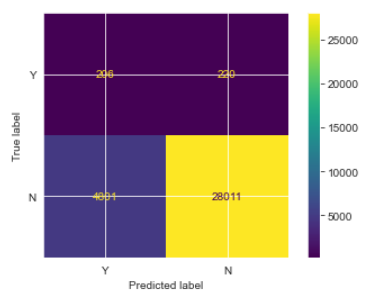
   <center>_Graph 5: Confusion Matrix_

## Inference: 
From the given confusion matrix we can see that our model predicted a total of **4801** suspected EV customers in the dataset.
    
    
    
    1. TP: the number of individuals who have an EV and were correctly identified by the model as having an EV
    2. FP: the number of individuals who do not have an EV but were incorrectly identified by the model as having an EV
    3. TN: the number of individuals who do not have an EV and were correctly identified by the model as not having an EV
    4. FN: the number of individuals who have an EV but were incorrectly identified by the model as not having an EV


#### The following account ids were identified.

## Section 4 : Conclusion

Based on the model's prediction, there are **4801** suspected EV customers in the dataset with an **accuracy of 85%**.This means that out of all the instances the model classified as suspected EV customers, 85% of them are actually suspected EV customers, while the remaining 15% are not.

Furthermore, by identifying the specific individuals using their indexes and corresponding account IDs, a line chart was plotted for the suspected EV customers and it showed a strong similarity with the actual EV customers,suggesting that the model has captured the relevant features that are strongly correlated with actual EV usage. 

In conclusion, Energia may use the Naive Bayes model to target these customers with their EV tariff.

 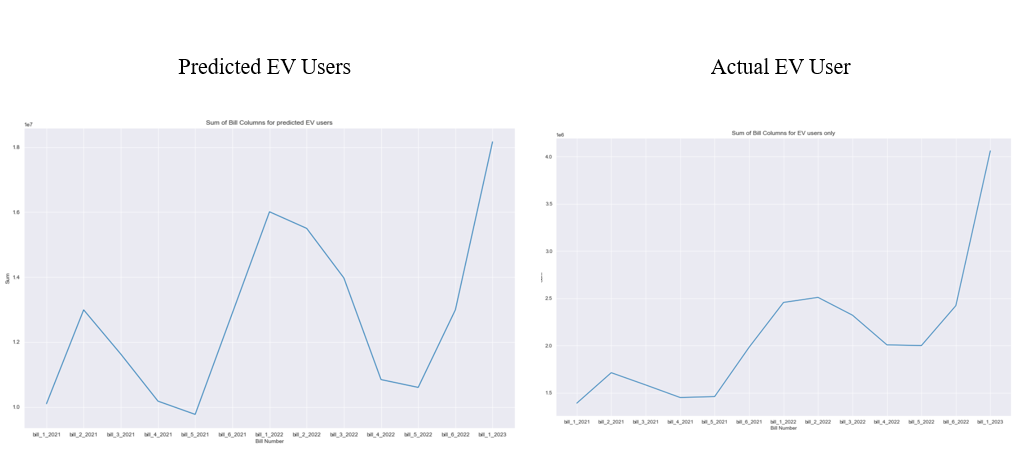

 <center>_Graph 6: line chart for Actual and Suspected EV User_